In [1]:
#Predict smallest Number

#!conda install -n mldds -c anaconda joblib
import os
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='once')

import multiprocessing
num_cores = multiprocessing.cpu_count()

print("Cores: ", num_cores)

import time
import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
# import tensorflow as tf
# config = tf.ConfigProto( device_count = {'GPU': 0 , 'CPU': num_cores} )
# sess = tf.Session(config=config) 
# keras.backend.set_session(sess)

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from MyTotoResearchv4 import *



Cores:  6


/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/opt/conda/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:75: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  return _inspect.getargspec(target)
/opt/conda/lib/python3.6/site-packages/tensorflow/python/keras/backend.py:4900: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/jovyan/.keras/keras.json' mode='r' encoding='UTF-8'>
  _config = json.load(open(_config_path))
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __nam

Done.


In [2]:
def getAllData(df):
    drop_cols = ['T', 'D', 'N1','N2','N3','N4','N5','N6','N7','L','M','S','R','E','A','V' ,'J','U']
    drop_cols = ['D', 'N1','N2','N3','N4','N5','N6','N7', 'Ph', 'il', 'age', 'dist', 'adia', 'sundist', 'sunadia' ]

#     Ph         1521 non-null float64
# il         1521 non-null float64
# age        1521 non-null float64
# dist       1521 non-null float64
# adia       1521 non-null float64
# sundist    1521 non-null float64
# sunadia    1521 non-null float64

#    drop_cols = ['T', 'D', 'M','S','R','E','A','V' ,'J','U']


    X = df.drop(drop_cols, axis=1)
    
    X = df[['T','L','M','S','R','E','A','V']]

#     df1 = df[['N1','N2','N3','N4','N5','N6','N7']]
#     X['smallest'] = df1.min(axis=1)
#     X['biggest'] = df1.max(axis=1)

    return X


def getSmallestN(df):
    df1 = df[['N1','N2','N3','N4','N5','N6','N7']]
    y = pd.DataFrame(index=df.index)
    y['SN'] = df1.min(axis=1)
    return y ;

def getBiggestN(df):
    df1 = df[['N1','N2','N3','N4','N5','N6','N7']]
    y = pd.DataFrame(index=df.index)
    y['LN'] = df1.max(axis=1)
    return y ;



In [3]:
seed = 42

mtr = MyTotoResearch(algo_no=1)
lresult, df = mtr.load_totodata()

X = mtr.modified_dataset(getAllData(df)) #

#X

#getSmallestN(df)
#getBiggestN(df)

Loaded MyTotoResearch algo_no:  1
1521
             D  N1  N2  N3  N4  N5  N6  N7
0     20040212  42  36  29  21  18  10   3
1     20040216  45  41  40  39  22   8   6
2     20040219  36  35  21  17  15   8   5
3     20040223  39  38  28  23  21  20   6
4     20040226  44  40  26  25  16  10   3
5     20040301  29  28  27  25  22  20  14
6     20040304  43  41  40  25   7   6   2
7     20040308  44  42  21  19  18  17   2
8     20040311  43  36  34  26  24  18  10
9     20040315  45  35  32  16  13   9   1
10    20040318  43  42  40  31  21  17   6
11    20040322  35  28  27  23  22  21  16
12    20040325  43  38  37  20  18  13   6
13    20040329  32  24  19   7   6   2   1
14    20040401  40  39  31  28  27   9   3
15    20040405  33  16  15  13  12   7   4
16    20040408  39  36  33  30  25  11   4
17    20040412  37  32  29  16  10   8   2
18    20040415  34  32  26  19   9   3   2
19    20040419  45  39  36  26  18  15  10
20    20040422  37  26  23  14   8   6   5
21    20040426 

Accuracy:  88.67924528301887


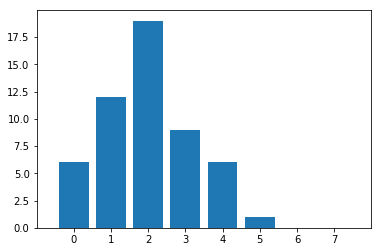

20180514 < 16 >  [17 24 29 45 46 49  5]  ** [5] **  [  5.   8.   9.  10.  18.  19.  20.  25.  26.  27.  28.  30.  35.  36.  39.
  40.]
20180517 < 12 >  [ 7 21 25 29 35 37 13]  ** [29 37] **  [  5.   6.  10.  11.  18.  19.  29.  30.  36.  37.  41.  42.]
20180521 < 13 >  [ 8 10 16 30 37 44 17]  ** [17] **  [  4.   5.  12.  17.  18.  26.  28.  31.  32.  36.  38.  41.  42.]
20180524 < 13 >  [11 25 26 34 36 42 16]  ** [16 25 26 36] **  [  4.   5.  14.  15.  16.  25.  26.  30.  35.  36.  37.  38.  41.]
20180528 < 14 >  [ 5  9 27 28 30 44  2]  ** [ 5 44] **  [  4.   5.  11.  12.  17.  18.  19.  20.  21.  24.  41.  44.  45.  46.]
20180531 < 14 >  [11 13 24 26 47 49 33]  ** [26 33] **  [  7.   8.   9.  12.  14.  15.  16.  25.  26.  31.  32.  33.  34.  35.]
20180604 < 13 >  [20 22 31 37 43 45 27]  ** [37] **  [  7.  11.  13.  14.  15.  16.  24.  25.  33.  34.  35.  37.  38.]
20180607 < 16 >  [12 20 29 31 37 39 42]  ** [12 20 29 39] **  [  8.  10.  11.  12.  17.  18.  20.  21.  24.  26.  29.  30.

KeyError: 'the label [67] is not in the [index]'

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, SGDRegressor, SGDClassifier, LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import AdaBoostRegressor

scaler = StandardScaler()
scaler.fit(X.drop('T',axis=1))

X_scaled = scaler.transform(X.drop('T',axis=1))
X_scaled = X

l_encoder = LabelEncoder()
result = pd.DataFrame(index=df.index)
result['T'] = df['T']

test_data = mtr.get_test_data()

import array as arr

model_store = []
model_2nd = []
for i in range(1,8):
    y = pd.DataFrame(index=df.index)
    y['N'+str(i)] = df['N'+str(i)]
#    y['N'+str(i)] = l_encoder.fit_transform(df['N'+str(i)])

#    y = getSmallestN(df)
#    y = getBiggestN(df)
    y = y.values.ravel()

    dt = LinearRegression(fit_intercept=True)
    model = Pipeline([('poly', PolynomialFeatures(degree=5)),
                      ('linear', AdaBoostRegressor(random_state=seed,base_estimator=dt,learning_rate=1))])
#                      ('linear', Lasso())])

    model.fit(X_scaled, y)

    model_store.append(model)
    result['N'+str(i)+'_PR1'] = model.predict(X_scaled).round()

    model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                      ('linear', AdaBoostRegressor(random_state=seed,base_estimator=dt,learning_rate=1))])
#                      ('linear', Lasso())])
    model.fit(X_scaled, y)
    model_store.append(model)
    result['N'+str(i)+'_PR2'] = model.predict(X_scaled).round()

    model = Pipeline([('poly', PolynomialFeatures(degree=4)),
                      ('linear', AdaBoostRegressor(random_state=seed,base_estimator=dt,learning_rate=1))])
#                      ('linear', Lasso())])
    model.fit(X_scaled, y)
    model_store.append(model)
    result['N'+str(i)+'_PR3'] = model.predict(X_scaled).round()


    
#     model = Pipeline([('poly', PolynomialFeatures(degree=4)),
#                       ('linear', Lasso(fit_intercept=True))])
# #                      ('linear', Lasso())])
#     model.fit(X_scaled, y)
#     model_store.append(model)
#     result['N'+str(i)+'_PR3'] = model.predict(X_scaled).round()



#     model = Pipeline([('poly', PolynomialFeatures(degree=3)),
#                       ('linear', LinearRegression(fit_intercept=False))])
# #                      ('linear', Lasso())])
#     model.fit(X_scaled, y)
#     model_2nd.append(model)
#     result['N'+str(i)+'_PL3'] = model.predict(X_scaled)

#     model = Pipeline([('poly', PolynomialFeatures(degree=5)),
#                       ('linear', LinearRegression(fit_intercept=False))])
# #                      ('linear', Lasso())])
#     model.fit(X_scaled, y)
#     model_2nd.append(model)
#     result['N'+str(i)+'_PL4'] = model.predict(X_scaled)




#     result['N'+str(i)+'_P0'] = result['N'+str(i)+'_P'].apply(np.ceil)
#     result['N'+str(i)+'_P1'] = result['N'+str(i)+'_P'].apply(np.floor)



#print(result)

#df['Predicted'] = model.predict(X_scaled)
#df['Y'] = y
#df['Y'] = l_encoder.inverse_transform(y)

#print(df.loc[:,['Predicted', 'Y']])

print ( "Accuracy: ",  mtr.getAccuracyCount(np.array(result)))
mtr.plot_matched_counts(result.values)
mtr.print_result(result)


In [ ]:
columns = result.columns #['N'+str(i)+'_P' for i in range(1,8)]
print(result.columns)
my_prediction = pd.DataFrame(result, columns=columns)

print(my_prediction)
for col in columns:
    my_prediction[col] = my_prediction[col].apply(lambda x: int(x) if x == x else "")
    
#print(my_prediction)
print ( "Accuracy: ",  mtr.getAccuracyCount(np.array(my_prediction)))
mtr.plot_matched_counts(my_prediction.values)
mtr.print_result(my_prediction)
#mtr.print_predictions(my_prediction)


In [ ]:
test_data = mtr.get_test_data()
#X_test = mtr.modified_dataset(getAllData(test_data)) #
X_test = test_data[X.columns]
#scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test.drop('T',axis=1))
#[X.columns])
X_test_scaled = X_test
#[X.columns]
test_result = pd.DataFrame(index=X_test.index)
test_result['T'] = test_data['T']

for i in range(1,8):
    test_result['N'+str(i)+'_P'] = model_store[i-1].predict(X_test_scaled).round()
#     test_result['N'+str(i)+'_P0'] = test_result['N'+str(i)+'_P']-1
#     test_result['N'+str(i)+'_P1'] = test_result['N'+str(i)+'_P']+1


#mtr.print_result(test_result)
mtr.print_predictions(test_result.astype(int))



In [ ]:
predicted_result = np.unique(result.values)
print(result.values)
predicted_result = [np.unique(a) for a in result.values]
len(predicted_result)